# Modelos baseados em Árvores

Modelos baseados em árvores são aqueles que utilizam uma estrutura de árvore para representar um conjunto de regras de decisão que podem ser aplicadas para classificar uma instância. Esses modelos são muito utilizados em problemas de classificação e regressão.

A estrutura de árvore é composta por nós, que representam uma condição sobre um atributo, e por arestas, que representam o resultado da condição. A partir de um nó raiz, a árvore é percorrida até que uma folha seja encontrada. A folha representa a classe que a instância pertence.

In [26]:
import polars as pl
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz

from sklearn.ensemble import RandomForestClassifier

## Carregando dados

In [16]:
df = pl.read_csv("data/card_transdata.csv")
df.head()

distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
f64,f64,f64,f64,f64,f64,f64,f64
57.877857,0.31114,1.94594,1.0,1.0,0.0,0.0,0.0
10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [17]:
df.shape

(1000000, 8)

In [19]:
df.describe()

describe,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
str,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",1e6,1e6,1e6,1e6,1e6,1e6,1e6,1e6
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
"""std""",65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
"""min""",0.004874,0.000118,0.004399,0.0,0.0,0.0,0.0,0.0
"""25%""",3.878014,0.296671,0.475673,1.0,0.0,0.0,0.0,0.0
"""50%""",9.967777,0.998653,0.997722,1.0,0.0,0.0,1.0,0.0
"""75%""",25.744027,3.355794,2.096374,1.0,1.0,0.0,1.0,0.0
"""max""",10632.723672,11851.104565,267.802942,1.0,1.0,1.0,1.0,1.0


## Criando um modelo de árvore

In [21]:
X = df.select(
    pl.all().exclude('fraud')
)

y = df.select('fraud')

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

### Decision Tree

In [24]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=7)
dt.fit(X_train, y_train)
y_hat = dt.predict(X_test)

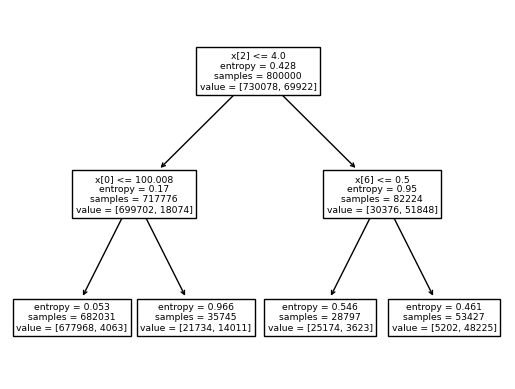

In [32]:
plot_tree(dt);

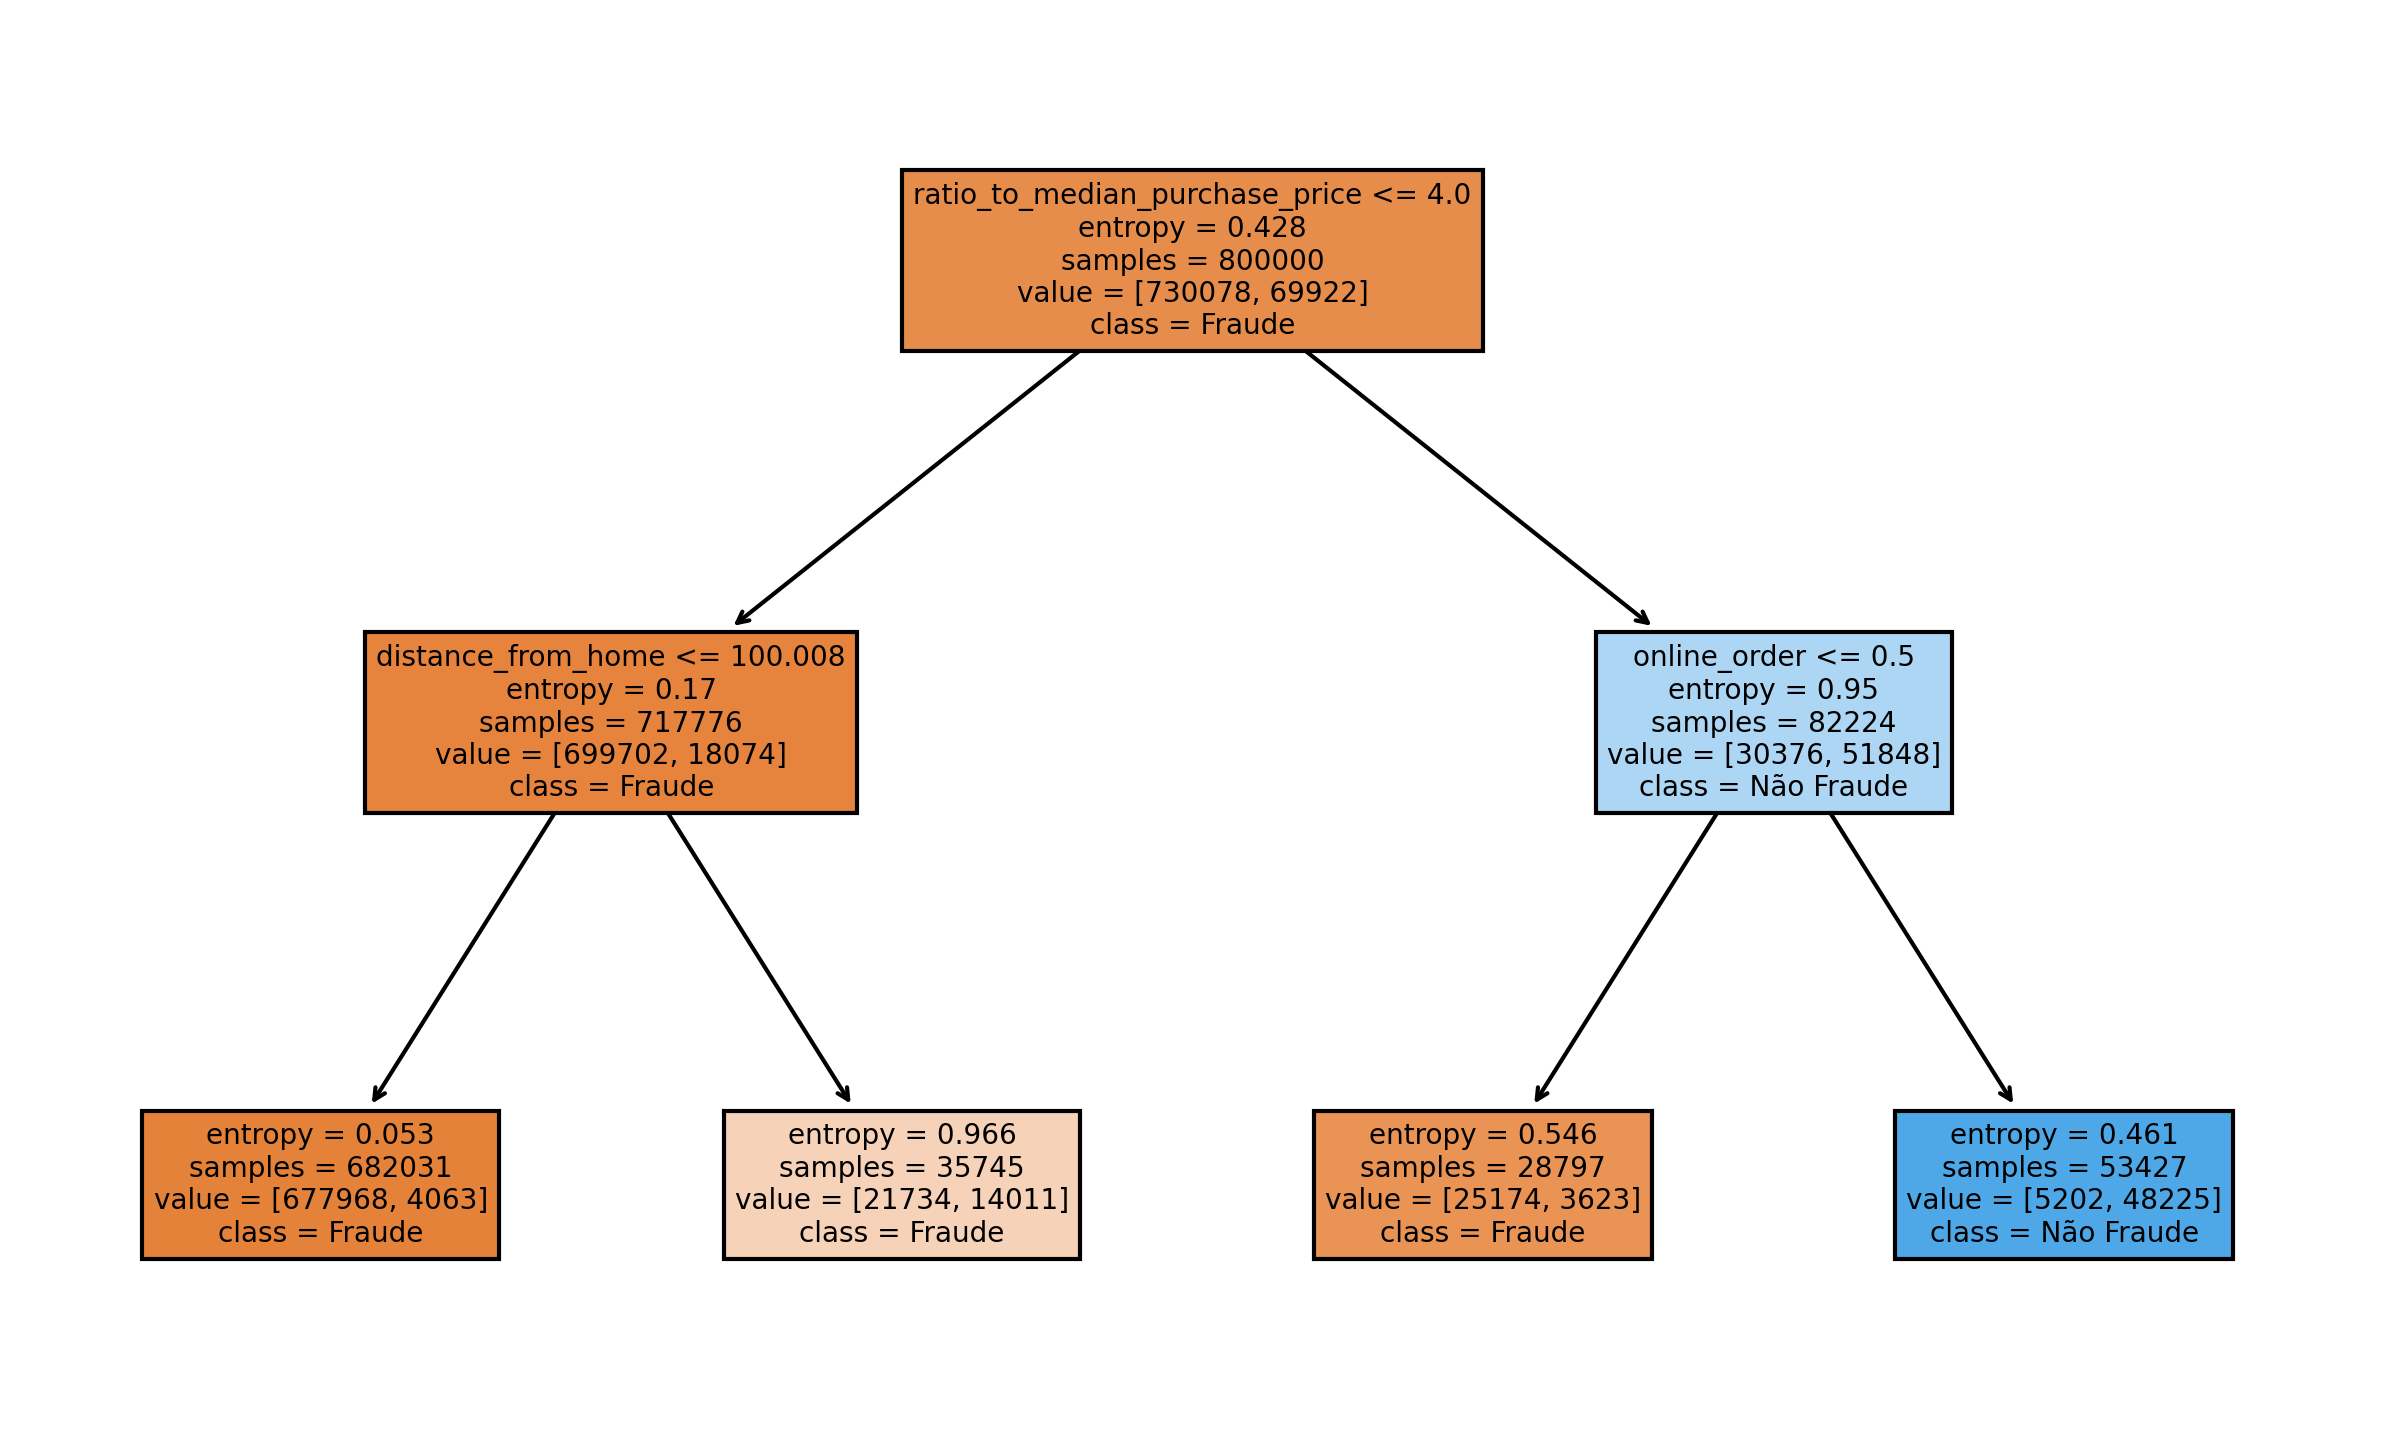

In [31]:
class_name = ['Fraude', 'Não Fraude']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,6), dpi=300)
plot_tree(dt,
          feature_names = list(X.columns), 
          class_names= class_name,
          filled = True);

fig.savefig('images/decision_tree.png')

In [33]:
print(f'Acurácia: {accuracy_score(y_test, y_hat)}')

Acurácia: 0.96739


### Random Forest

A Random Forest é um modelo de aprendizado de máquina que utiliza um conjunto de árvores de decisão para realizar a classificação de uma instância. Cada árvore é treinada com uma amostra aleatória do conjunto de dados de treinamento. A classificação final é realizada por meio de uma votação entre as árvores.

In [56]:
n_arvores = 6

rf = RandomForestClassifier(n_estimators=n_arvores, max_depth=3, random_state=7)
rf.fit(X_train, y_train.to_numpy().ravel())

estimator = rf.estimators_

y_hat_rf = rf.predict(X_test)

In [57]:
print(f'Acurácia: {accuracy_score(y_test, y_hat_rf)}')

Acurácia: 0.975175


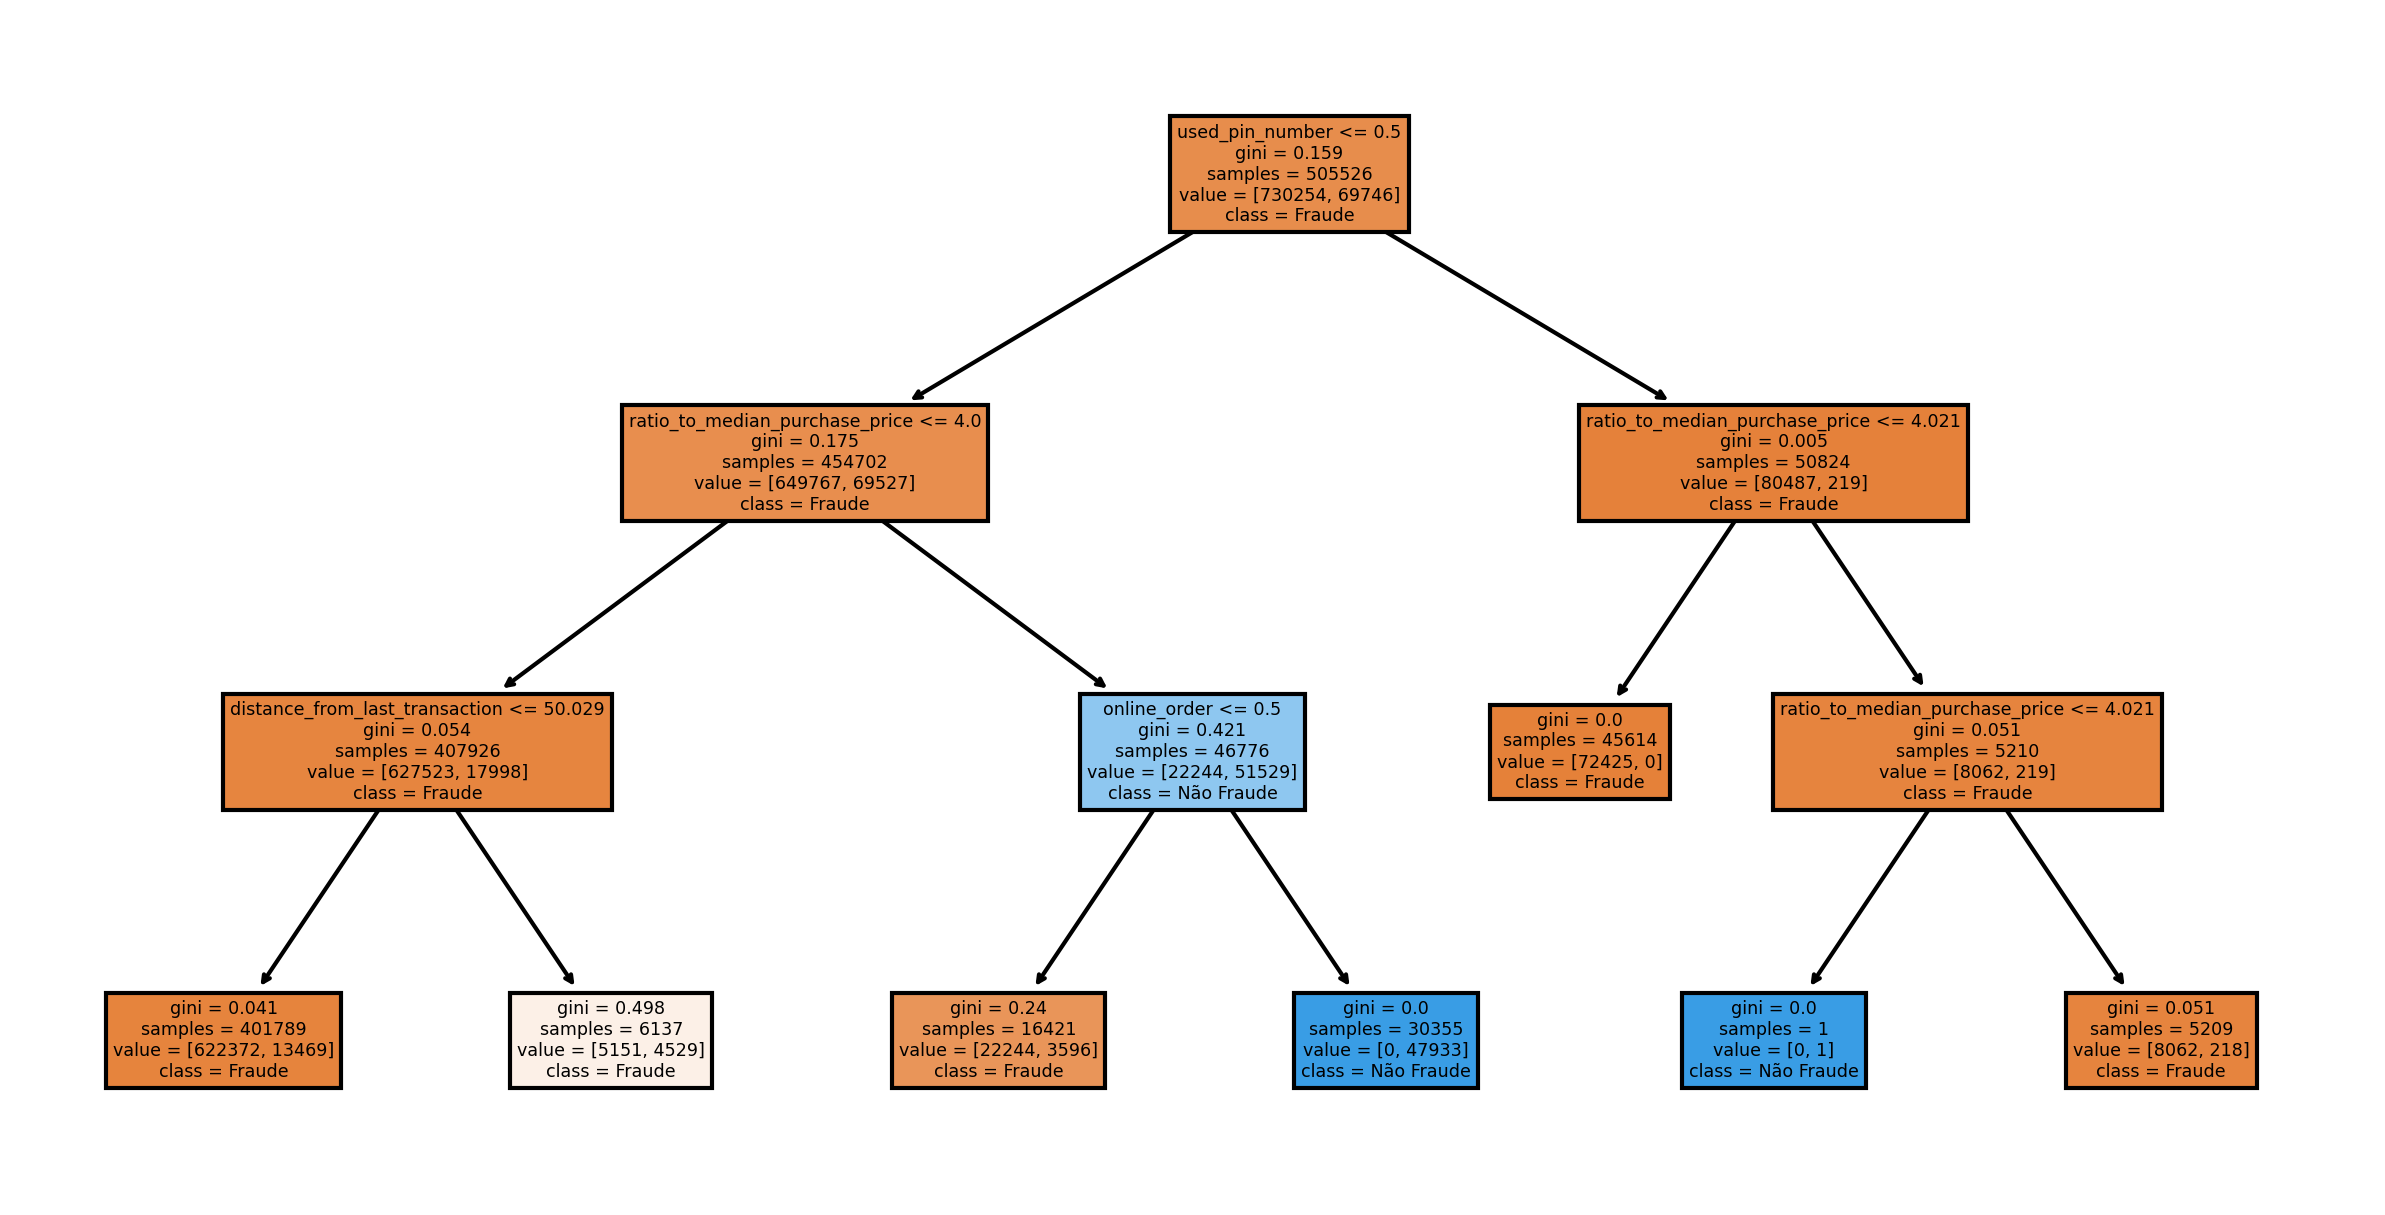

In [58]:
class_name = ['Fraude', 'Não Fraude']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=300)
plot_tree(estimator[0],
          feature_names = list(X.columns), 
          class_names= class_name,
          filled = True);

fig.savefig('images/rf_primeira_arvore.png')

In [61]:
class_name = ['Fraude', 'Não Fraude']

fig, axes = plt.subplots(nrows = 1, ncols = n_arvores,figsize = ((n_arvores*7),4), dpi=800)
for i in range(n_arvores):
    plot_tree(estimator[i],
            feature_names = list(X.columns), 
            class_names= class_name,
            filled = True,
            ax=axes[i]);

    axes[i].set_title(f'Árvore {i}')

fig.savefig('images/rf_arvores.png')